In [1]:
import os
os.chdir('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
from collections import Iterable
import random

import scipy.stats as st

import seaborn as sns
sns.set_style("whitegrid")

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

D:\Users\glede\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  


# Calculations for stats and plots are based on: https://github.com/stasmix/popsynth/blob/master/pop-synth-vae.ipynb

# Load the files

In [3]:
files = ['../data/Chicago/full.csv', 
         '../synth_data/TGAN_100.csv', 
         '../synth_data/TGAN_200.csv', 
         '../synth_data/TGAN_500.csv',
         '../synth_data/TGAN_1000.csv',
         '../synth_data/DATGAN_FC_100.csv',
         '../synth_data/DATGAN_FC_200.csv',
         '../synth_data/DATGAN_FC_500.csv',
         '../synth_data/DATGAN_FC_1000.csv',
         '../synth_data/DATGAN_FC_100_ep.csv',
         '../synth_data/DATGAN_FC_200_ep.csv',
         '../synth_data/DATGAN_FC_500_ep.csv',
         '../synth_data/DATGAN_FC_1000_ep.csv',
         '../synth_data/DATGAN_NO_ATT_100_ep.csv',
         '../synth_data/DATGAN_NO_ATT_200_ep.csv',
         '../synth_data/DATGAN_NO_ATT_500_ep.csv',
         '../synth_data/DATGAN_NO_ATT_1000_ep.csv',]
labels = ['original', 'tgan - 100ep', 'tgan - 200ep', 'tgan - 500ep', 'tgan - 1000ep', 
          'datgan_fc - 100ep', 'datgan_fc - 200ep', 'datgan_fc - 500ep', 'datgan_fc - 1000ep',
          'datgan_fc_fix - 100ep', 'datgan_fc_fix - 200ep', 'datgan_fc_fix - 500ep', 'datgan_fc_fix - 1000ep',
          'datgan_no_att - 100ep', 'datgan_no_att - 200ep', 'datgan_no_att - 500ep', 'datgan_no_att - 1000ep',
         ]


In [4]:
dfs = [pd.read_csv(file) for file in files]

In [5]:
continuous_cols = ['distance', 'age', 'departure_time']

In [6]:
dfs[0]

choice  travel_dow trip_purpose  distance  hh_vehicles  hh_size  \
0      drive           7   HOME_OTHER  23.42579            2        2   
1      drive           7        OTHER   1.71259            2        2   
2      drive           7   HOME_OTHER  21.77887            2        2   
3      drive           7     SHOPPING   2.02603            2        2   
4      drive           7     SHOPPING   0.87691            2        2   
...      ...         ...          ...       ...          ...      ...   
87941  drive           2        OTHER   2.42141            1        1   
87942  drive           2   HOME_OTHER   1.16283            1        1   
87943  drive           2   HOME_OTHER   0.54234            1        1   
87944  drive           2        OTHER   1.49183            1        1   
87945  drive           2   HOME_OTHER   1.23051            1        1   

       hh_bikes  hh_descr  hh_income  gender  age  license  education_level  \
0             0         2          6       1   66      1.0                6   
1             0         2          6       1   66      1.0                6   
2             0         2          6       1   66      1.0                6   
3             0         2          6       1   66      1.0                6   
4             0         2          6       1   66      1.0                6   
...         ...       ...        ...     ...  ...      ...              ...   
87941         0         1          3       0   59      1.0                4   
87942         0         1          3       0   59      1.0                4   
87943         0         1          3       0   59      1.0                4   
87944         0         1          3       0   59      1.0                4   
87945         0         1          3       0   59      1.0                4   

      work_status  departure_time  
0             FTE        9.333333  
1             FTE       12.083333  
2             FTE       15.500000  
3             FTE       17.500000  
4             FTE       18.250000  
...           ...             ...  
87941         PTE       13.750000  
87942         PTE       14.083333  
87943         PTE       14.666667  
87944         PTE       15.333333  
87945         PTE       15.500000  

[87946 rows x 15 columns]

In [7]:
dfs[4]

choice  travel_dow     trip_purpose   distance  hh_vehicles  \
0             pt           1        HOME_WORK  33.127106            0   
1           walk           5         SHOPPING   0.324636            2   
2             pt           1        HOME_WORK   3.340066            2   
3             pt           5        HOME_WORK  17.013699            2   
4      passenger           3         HOME_EDU   2.557210            2   
...          ...         ...              ...        ...          ...   
87795  passenger           2            OTHER   2.247930            2   
87796      drive           6       HOME_OTHER   0.790761            2   
87797  passenger           3        HOME_WORK   2.402349            3   
87798       walk           3  ESCORT_TRANSFER   2.442087            3   
87799      drive           1       HOME_OTHER   0.991730            2   

       hh_size  hh_bikes  hh_descr  hh_income  gender   age  license  \
0            1         0         2          5       1  79.0      1.0   
1            5         5         1          7       0  45.0      1.0   
2            2         0         1          6       1  61.0      1.0   
3            2         2         1          7       0  42.0      1.0   
4            4         4         1          6       1   4.0      0.0   
...        ...       ...       ...        ...     ...   ...      ...   
87795        4         4         1          7       1   8.0      0.0   
87796        4         3         1          5       1  52.0      1.0   
87797        2         0         1          7       1  54.0      1.0   
87798        5         2         1          7       0  71.0      1.0   
87799        2         1         1          5       1  62.0      1.0   

       education_level work_status  departure_time  
0                    2   Volunteer        7.558345  
1                    5         FTE       15.445040  
2                    4         FTE       13.845608  
3                    2         FTE        7.304633  
4                    1     Student        8.025876  
...                ...         ...             ...  
87795                1     Student       17.754266  
87796                5         FTE       12.287645  
87797                2         FTE       12.329173  
87798                2         FTE        9.137005  
87799                6         FTE        7.395298  

[87800 rows x 15 columns]

# Transform all values in numerical

In [8]:
ints = ['travel_dow', 'hh_vehicles', 'hh_size', 'hh_bikes', 'hh_descr', 'hh_income', 'gender', 'education_level', 'age']
floats = ['departure_time', 'distance', 'license']

In [9]:
dct = {}

for i in ints:
    dct[i] = 'int64'
    
for i in floats:
    dct[i] = 'float64'

In [10]:
dct

{'travel_dow': 'int64',
 'hh_vehicles': 'int64',
 'hh_size': 'int64',
 'hh_bikes': 'int64',
 'hh_descr': 'int64',
 'hh_income': 'int64',
 'gender': 'int64',
 'education_level': 'int64',
 'age': 'int64',
 'departure_time': 'float64',
 'distance': 'float64',
 'license': 'float64'}

In [11]:
dfs = [df.astype(dct) for df in dfs]

In [12]:
choices = {}
trip_purpose = {}
work_status = {}

for c in ['choice', 'trip_purpose', 'work_status']: 
    dct = {}
    
    for n, i in enumerate(dfs[0][c].unique()):
        if c == 'choice':
            choices[n] = i
            
        if c == 'trip_purpose':
            trip_purpose[n] = i
            
        if c == 'work_status':
            work_status[n] = i
        
        dct[i] = n
        
    dfs = [df.replace(dct) for df in dfs]

In [13]:
dfs[0].dtypes

choice               int64
travel_dow           int64
trip_purpose         int64
distance           float64
hh_vehicles          int64
hh_size              int64
hh_bikes             int64
hh_descr             int64
hh_income            int64
gender               int64
age                  int64
license            float64
education_level      int64
work_status          int64
departure_time     float64
dtype: object

# Compute the stats

In [14]:
# calculate min_max_bins for an arbitrary discretization scheme
def get_min_max(data1, data2, num_bins, cont_cols):
    """
    Create a dictionnary with all variables indicating the number of bins and the min and max value 
    """
    
    min_max = {}
    eps = 1e-10
    
    # Go through all columns in the first dataset (assuming data2 has the same columns)
    for c in data1.columns:
        if c in cont_cols: # Continuous column
            
            # Compute min and max values between both datasets
            min_val = min(np.min(data1[c]), np.min(data2[c])) - eps
            max_val = max(np.max(data1[c]), np.max(data2[c])) + eps
            
            # Fill the dict
            min_max[c] = [min_val, max_val, num_bins]
            
        else: # Categorical column
            # Set of all unique values in both datasets
            unique_vals = set(np.unique(data1[c])).union(set(np.unique(data2[c])))
                                    
            num_bins_cat = min(len(unique_vals), num_bins)
            
            min_max[c] = [min(unique_vals), max(unique_vals), num_bins_cat]
                

    return min_max

In [15]:
def get_frequency_list(original, synthetic, max_num_bins, cat=True):
    """
    Compute the frequency lists
    """
    
    # Check if the number of unique values is less than the max
    # number of bins for the cat variables
    if cat:
        unique_vals = set(np.unique(original)).union(set(np.unique(synthetic)))
        
        if len(unique_vals) > max_num_bins:
            cat = False
    
    eps = 1e-10
    # Compute min and max values between both datasets
    min_val = min(np.min(original), np.min(synthetic)) - eps
    max_val = max(np.max(original), np.max(synthetic)) + eps
    
    # Compute the bins
    bins = []
    if cat:
        # bins = all values
        bins = list(unique_vals)
        bins.sort()
    else:
        # bins = hist bins
        delta = (max_val-min_val)/max_num_bins
        for i in range(max_num_bins+1):
            bins.append(min_val+delta*i)
            
    # Calculate the frequencies
    freqs = []
    if cat:
        count_orig = [(original==b).sum() for b in bins]
        count_synth = [(synthetic==b).sum() for b in bins]
        
        freqs = [count_orig, count_synth]
    else:
        hist_orig, _ = np.histogram(original, bins)
        hist_synth, _ = np.histogram(synthetic, bins)
        
        freqs = [hist_orig, hist_synth]

            
    return freqs, bins

In [16]:
def stats(freq_list_orig, freq_list_synth):
    """
    Different statistics computed on the frequency list
    
    """
    freq_list_orig, freq_list_synth = np.array(freq_list_orig), np.array(freq_list_synth)
    corr_mat = np.corrcoef(freq_list_orig, freq_list_synth)
    corr = corr_mat[0, 1]
    if np.isnan(corr): corr = 0.0
    # MAE
    mae = np.absolute(freq_list_orig - freq_list_synth).mean()
    # RMSE
    rmse = np.linalg.norm(freq_list_orig - freq_list_synth) / np.sqrt(len(freq_list_orig))
    # SRMSE
    freq_list_orig_avg = freq_list_orig.mean()
    srmse = rmse / freq_list_orig_avg
    # r-square
    u = np.sum((freq_list_synth - freq_list_orig)**2)
    v = np.sum((freq_list_orig - freq_list_orig_avg)**2)
    r2 = 1.0 - u / v
    stat = {'mae': mae, 'rmse': rmse, 'r2': r2, 'srmse': srmse, 'corr': corr}
    
    return stat

In [17]:
def plot(freqs_original, freqs_synthetic, title=None):
    f = plt.figure(figsize=(10,10))
    ax = f.add_subplot(111)
    
    min_val = min(np.min(freqs_original), np.min(freqs_synthetic))
    max_val = max(np.max(freqs_original), np.max(freqs_synthetic))
    
    plt.plot(freqs_original, freqs_synthetic, 'ok')
    
    reg = LinearRegression()
    reg.fit(np.array(freqs_original)[:, np.newaxis], np.array(freqs_synthetic))
    
    xfit = np.linspace(np.min(freqs_original), np.max(freqs_original), 10)
    yfit = reg.predict(xfit[:, np.newaxis])
    
    plt.plot(xfit, yfit, 'grey')
    
    stat = stats(freqs_original, freqs_synthetic)
    
    str_ = "SRMSE={:.3f}\nR²={:.3f}\ny={:.3f}x".format(stat['srmse'], stat['r2'], reg.coef_[0])
    
    t = plt.text(0.05, 0.9,str_,
                 horizontalalignment='left',
                 verticalalignment='center',
                 transform = ax.transAxes,
                 fontsize=14)
    
    t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black'))
    
    plt.xlabel('Observed frequencies')
    plt.ylabel('Simulated frequencies')
    
    if title is not None:
        plt.title(title)

# Let's have some fun =)

In [18]:
orig_freqs = []
synth_freqs = []

for i in range(len(dfs)-1):
    synth_freqs.append([])

for c in dfs[0].columns:
    for i in range(1, len(dfs)):
        
        [a,b],bins = get_frequency_list(dfs[0][c], dfs[i][c], 50, c not in continuous_cols)
        
        if i == 1:
            orig_freqs.append(a)
        
        synth_freqs[i-1].append(b)

In [19]:
def flatten(items):
    """Yield items from any nested iterable; see Reference."""
    for x in items:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            for sub_x in flatten(x):
                yield sub_x
        else:
            yield x

In [20]:
orig_freqs = list(flatten(orig_freqs))


for i in range(len(synth_freqs)):
    synth_freqs[i] = list(flatten(synth_freqs[i]))

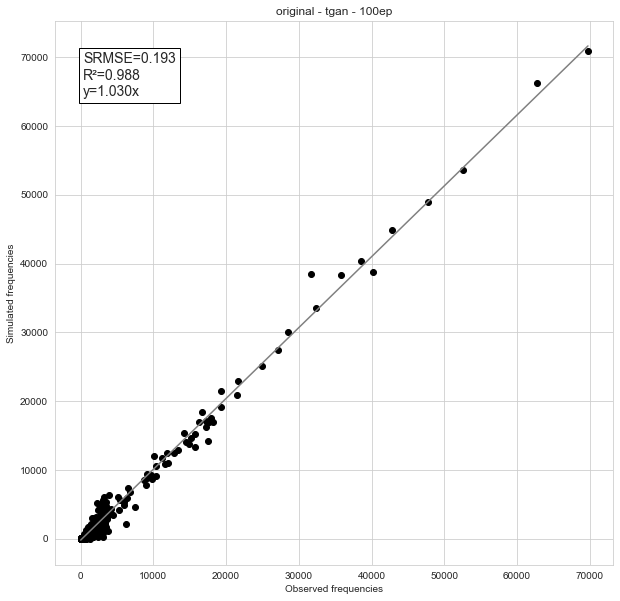

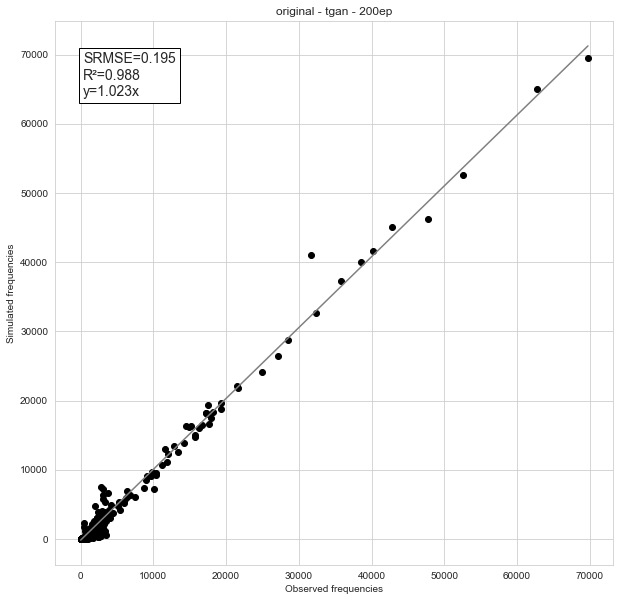

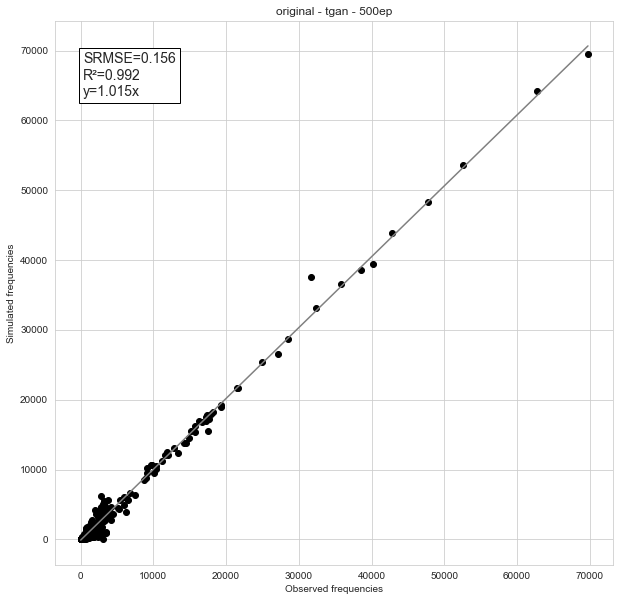

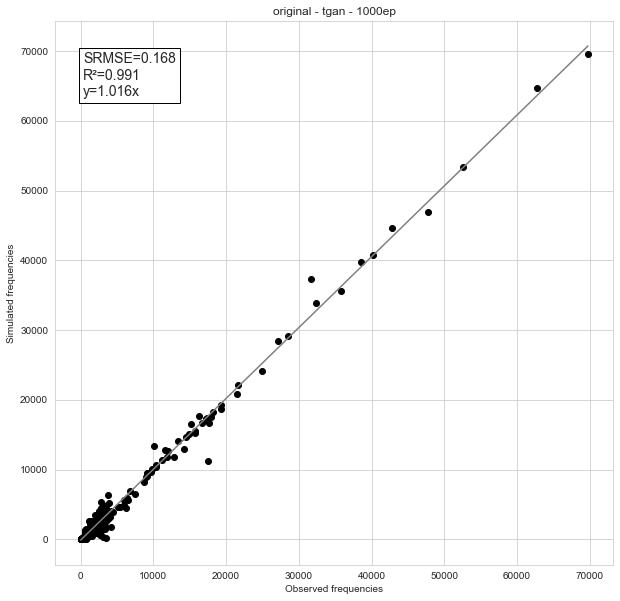

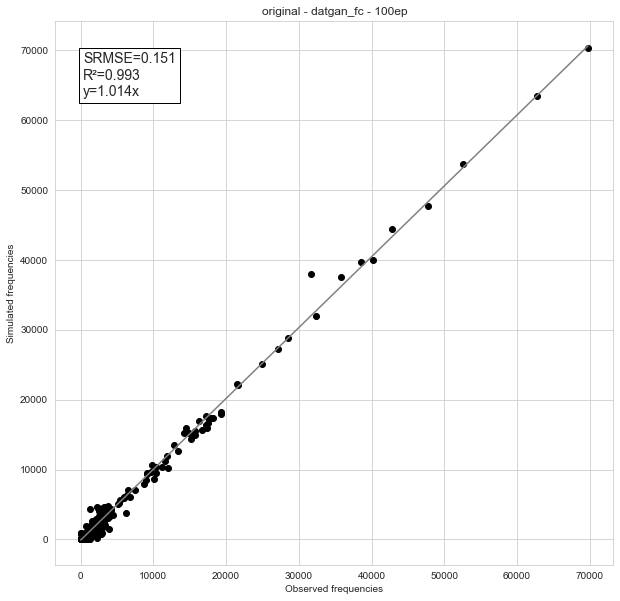

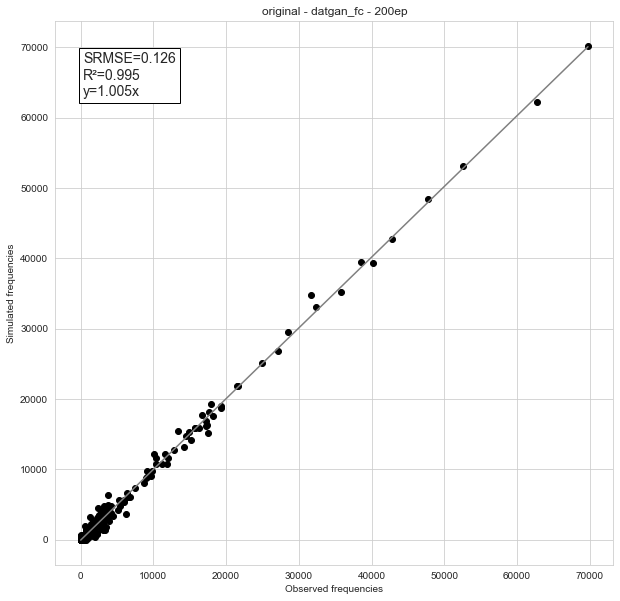

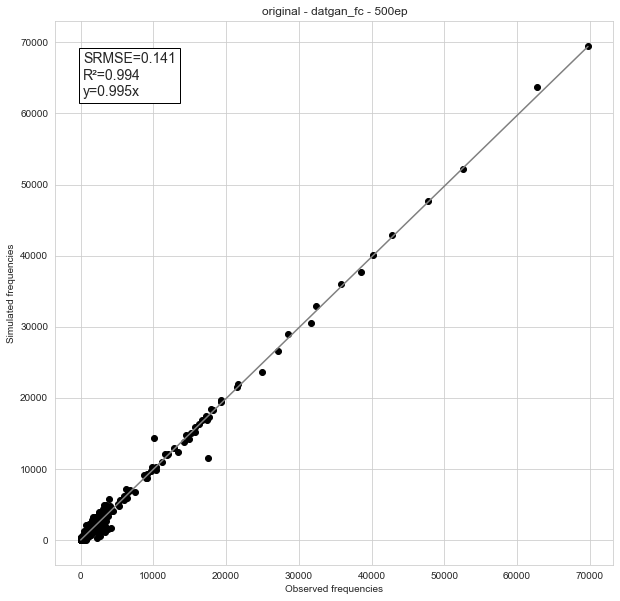

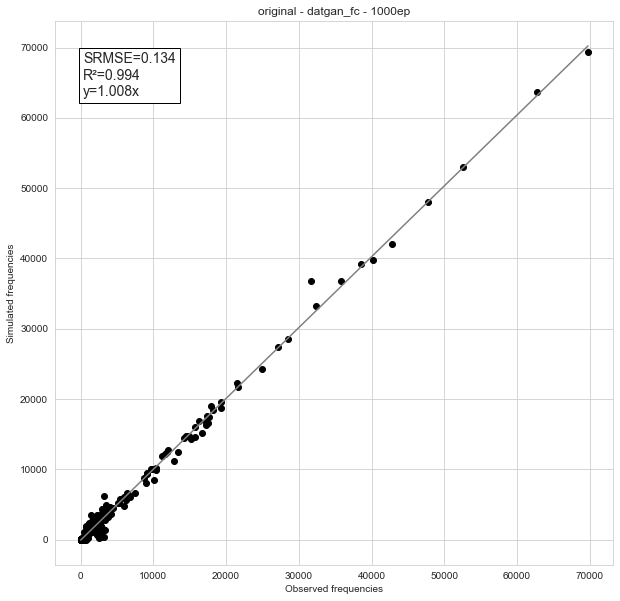

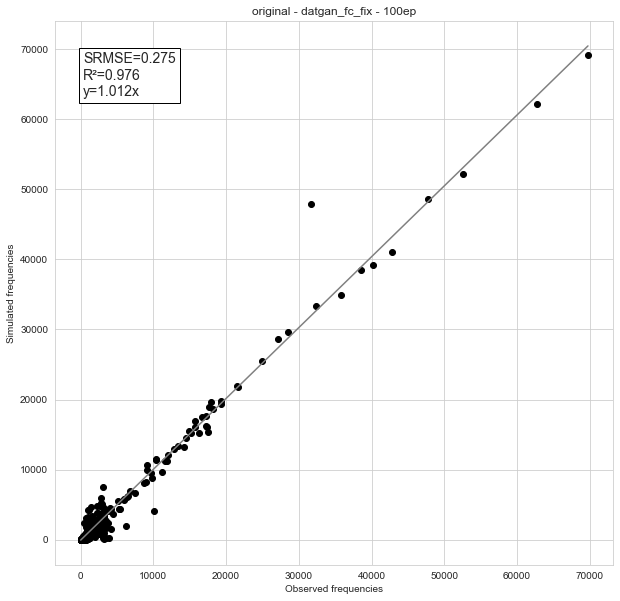

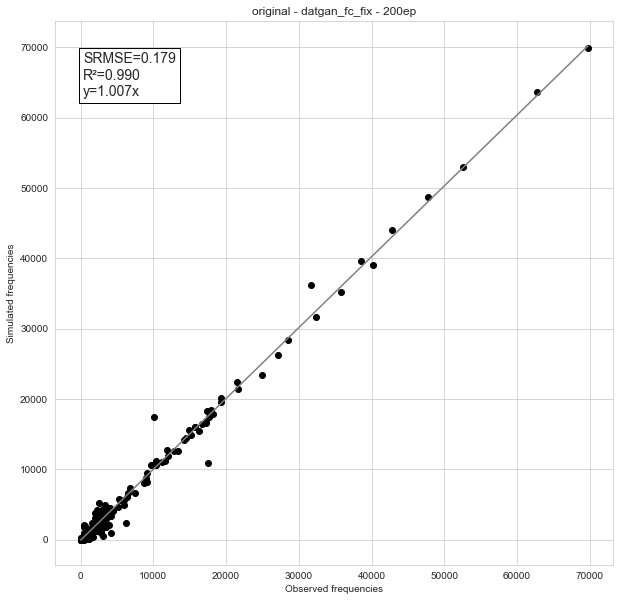

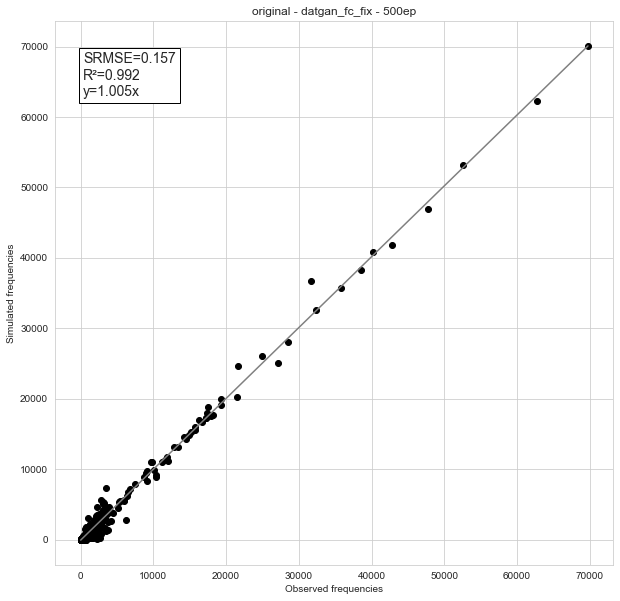

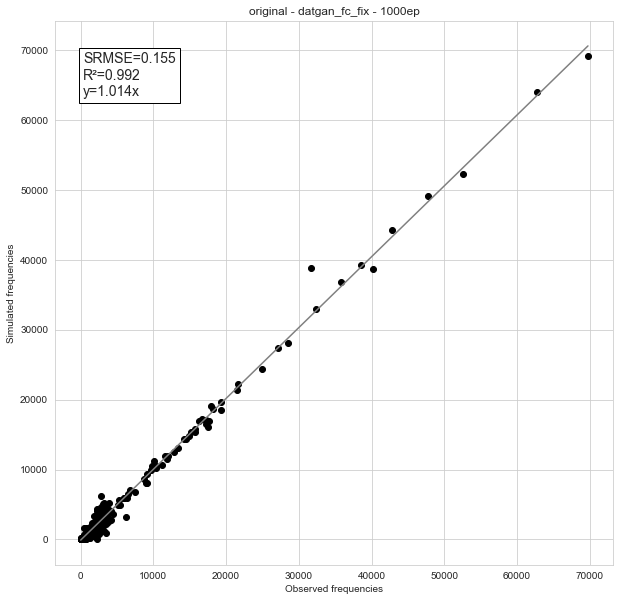

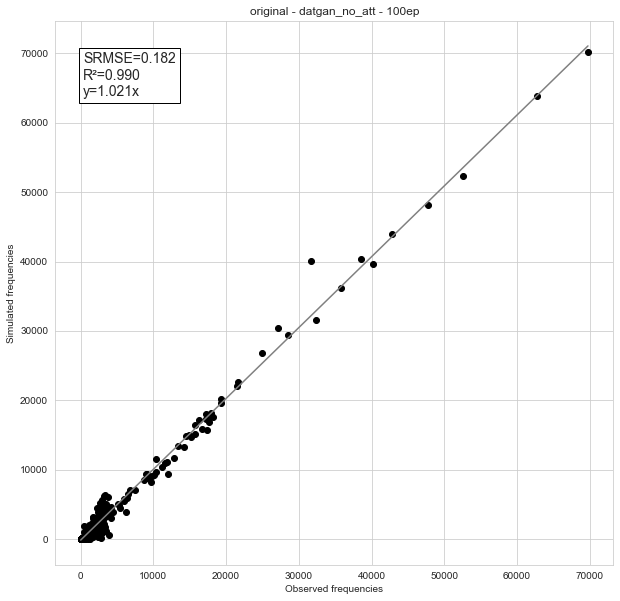

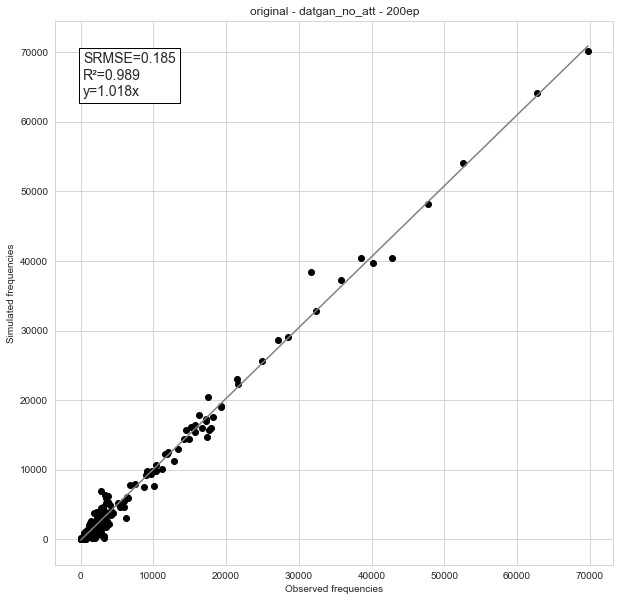

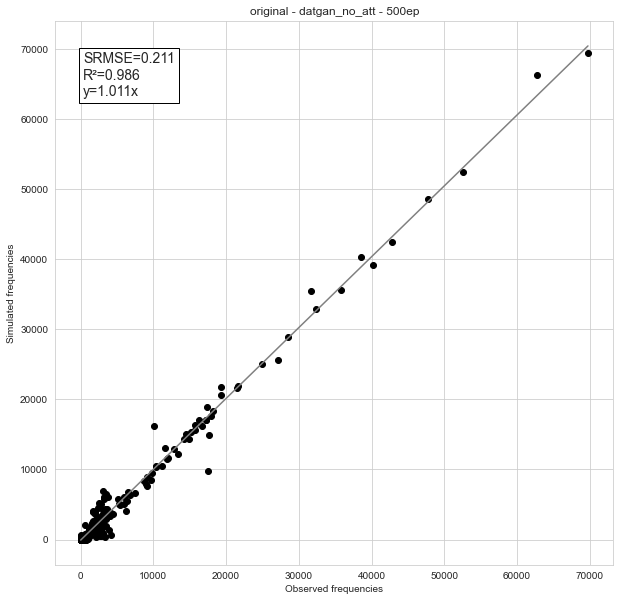

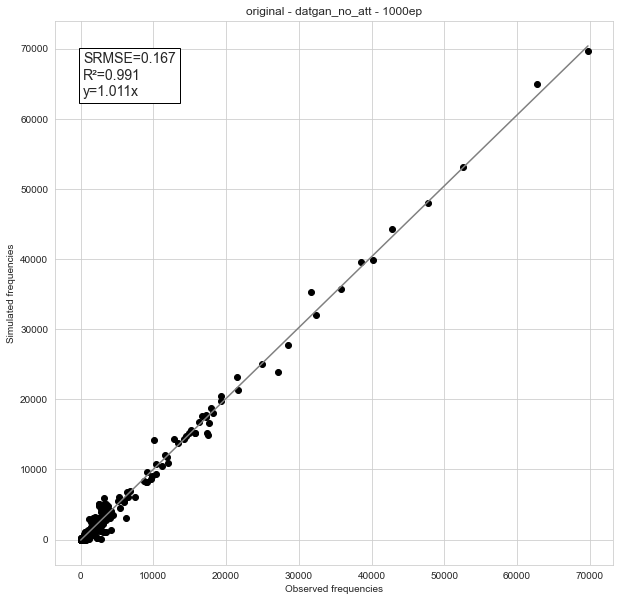

In [21]:
for i in range(len(synth_freqs)):
    plot(orig_freqs, synth_freqs[i], labels[0] + ' - ' + labels[i+1])

In [22]:
SRMSES = []

for i in range(len(dfs)-1):
    SRMSES.append([])

for c in dfs[0].columns:
    for i in range(1, len(dfs)):
        
        [a,b],bins = get_frequency_list(dfs[0][c], dfs[i][c], 50, c not in continuous_cols)
        
        stat = stats(a,b)
        
        SRMSES[i-1].append(stat['srmse'])

Averga of SRMSE
tgan - 100ep: 0.188
tgan - 200ep: 0.196
tgan - 500ep: 0.143
tgan - 1000ep: 0.161
datgan_fc - 100ep: 0.156
datgan_fc - 200ep: 0.128
datgan_fc - 500ep: 0.131
datgan_fc - 1000ep: 0.138
datgan_fc_fix - 100ep: 0.260
datgan_fc_fix - 200ep: 0.164
datgan_fc_fix - 500ep: 0.156
datgan_fc_fix - 1000ep: 0.154
datgan_no_att - 100ep: 0.179
datgan_no_att - 200ep: 0.188
datgan_no_att - 500ep: 0.191
datgan_no_att - 1000ep: 0.160


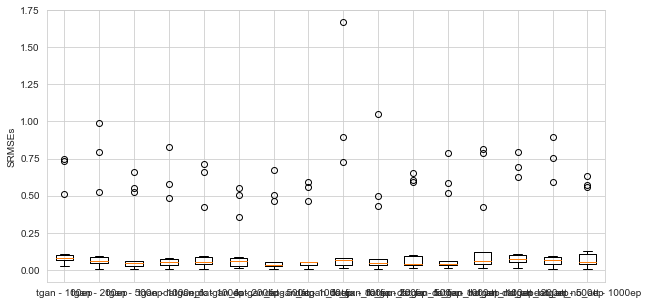

In [23]:
plt.figure(figsize=(10,5))
plt.boxplot(SRMSES)
plt.xticks(range(1,len(SRMSES)+1), labels[1:])
plt.ylabel('SRMSEs')

print("Averga of SRMSE")
for i in range(len(SRMSES)):
    print("{}: {:.3f}".format(labels[i+1], np.mean(SRMSES[i])))#*(pca_var[0]+pca_var[i+1])/2)))

In [24]:
stats_vals = []

for i in range(len(dfs)-1):
    stats_vals.append({'mae': [], 'rmse': [], 'r2': [], 'srmse': [], 'corr': []})

for c in dfs[0].columns:
    for i in range(1, len(dfs)):
        
        [a,b],bins = get_frequency_list(dfs[0][c], dfs[i][c], 50)
        
        stat = stats(a,b)
        
        for k in stat.keys():
            stats_vals[i-1][k].append(stat[k])

In [25]:
print("Weighted average of SRMSE")
for i in range(len(SRMSES)):
    print("{}: {:.3f}".format(labels[i+1], np.mean(stats_vals[i]['srmse'])))

Weighted average of SRMSE
tgan - 100ep: 0.188
tgan - 200ep: 0.196
tgan - 500ep: 0.143
tgan - 1000ep: 0.161
datgan_fc - 100ep: 0.156
datgan_fc - 200ep: 0.128
datgan_fc - 500ep: 0.131
datgan_fc - 1000ep: 0.138
datgan_fc_fix - 100ep: 0.260
datgan_fc_fix - 200ep: 0.164
datgan_fc_fix - 500ep: 0.156
datgan_fc_fix - 1000ep: 0.154
datgan_no_att - 100ep: 0.179
datgan_no_att - 200ep: 0.188
datgan_no_att - 500ep: 0.191
datgan_no_att - 1000ep: 0.160


In [26]:
print("Weighted average of RMSE")
for i in range(len(SRMSES)):
    print("{}: {:.3f}".format(labels[i+1], np.mean(stats_vals[i]['rmse'])))

Weighted average of RMSE
tgan - 100ep: 1115.031
tgan - 200ep: 918.812
tgan - 500ep: 628.403
tgan - 1000ep: 744.628
datgan_fc - 100ep: 712.504
datgan_fc - 200ep: 645.587
datgan_fc - 500ep: 499.256
datgan_fc - 1000ep: 618.376
datgan_fc_fix - 100ep: 983.546
datgan_fc_fix - 200ep: 717.389
datgan_fc_fix - 500ep: 702.271
datgan_fc_fix - 1000ep: 692.134
datgan_no_att - 100ep: 844.544
datgan_no_att - 200ep: 930.276
datgan_no_att - 500ep: 948.000
datgan_no_att - 1000ep: 802.497


In [27]:
print("Weighted average of MAE")
for i in range(len(SRMSES)):
    print("{}: {:.3f}".format(labels[i+1], np.mean(stats_vals[i]['mae'])))

Weighted average of MAE
tgan - 100ep: 880.875
tgan - 200ep: 705.170
tgan - 500ep: 499.037
tgan - 1000ep: 555.849
datgan_fc - 100ep: 536.964
datgan_fc - 200ep: 513.528
datgan_fc - 500ep: 377.849
datgan_fc - 1000ep: 459.954
datgan_fc_fix - 100ep: 708.243
datgan_fc_fix - 200ep: 556.947
datgan_fc_fix - 500ep: 513.845
datgan_fc_fix - 1000ep: 538.564
datgan_no_att - 100ep: 624.632
datgan_no_att - 200ep: 701.876
datgan_no_att - 500ep: 722.425
datgan_no_att - 1000ep: 630.728


In [28]:
print("Weighted average of R^2")
for i in range(len(SRMSES)):
    print("{}: {:.3f}".format(labels[i+1], np.mean(stats_vals[i]['r2'])))

Weighted average of R^2
tgan - 100ep: 0.866
tgan - 200ep: 0.855
tgan - 500ep: 0.886
tgan - 1000ep: 0.900
datgan_fc - 100ep: 0.911
datgan_fc - 200ep: 0.941
datgan_fc - 500ep: 0.926
datgan_fc - 1000ep: 0.912
datgan_fc_fix - 100ep: 0.775
datgan_fc_fix - 200ep: 0.921
datgan_fc_fix - 500ep: 0.881
datgan_fc_fix - 1000ep: 0.901
datgan_no_att - 100ep: 0.884
datgan_no_att - 200ep: 0.868
datgan_no_att - 500ep: 0.863
datgan_no_att - 1000ep: 0.893


In [29]:
print("Weighted average of corr")
for i in range(len(SRMSES)):
    print("{}: {:.3f}".format(labels[i+1], np.mean(stats_vals[i]['corr'])))

Weighted average of corr
tgan - 100ep: 0.964
tgan - 200ep: 0.964
tgan - 500ep: 0.967
tgan - 1000ep: 0.970
datgan_fc - 100ep: 0.966
datgan_fc - 200ep: 0.977
datgan_fc - 500ep: 0.971
datgan_fc - 1000ep: 0.969
datgan_fc_fix - 100ep: 0.930
datgan_fc_fix - 200ep: 0.971
datgan_fc_fix - 500ep: 0.960
datgan_fc_fix - 1000ep: 0.972
datgan_no_att - 100ep: 0.967
datgan_no_att - 200ep: 0.961
datgan_no_att - 500ep: 0.961
datgan_no_att - 1000ep: 0.967
